In [3]:
# Import Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import *
import matplotlib.pyplot as plt

# Function to implement the Bernstein-Vazirani circuit
def bernstein_vazirani(s: str):
    n = len(s)  # Number of qubits

    # Step 1: Initialize registers
    # We need n qubits for the input register and one ancillary qubit for the oracle.
    # We also need n classical bits to store the measurement results.
    # The qubits are automatically initialized to the state |0⟩.
    
    qc = QuantumCircuit(n + 1, n)

    # Step 2 To create the phase oracle, we need the ancillary qubit in the state |−⟩.
    # We achieve this by applying an X gate (to make it |1⟩) followed by a Hadamard gate.
    qc.x(n)
    qc.h(n)
    qc.barrier() # Add a barrier for visual clarity
    # Apply Hadamard gates to all input qubits
    # This puts the input register into a superposition of all possible states.
    qc.h(range(n))
    
    qc.barrier() # Add a barrier for visual clarity
    
   # Step 3: Apply the phase oracle U_f
    # The oracle flips the phase of the states |x⟩ based on the secret string 's'.
    # It applies a CNOT for each '1' in the secret_string.
    # The i-th qubit is the control and the ancillary qubit is the target.
    # We iterate through the secret string in reverse because Qiskit orders qubits from right to left (q0, q1, ...).
    for i, bit in enumerate(reversed(s)):
        if bit == '1':
            qc.cx(i, n) # Apply CNOT from data qubit i to the ancilla

    qc.barrier() # for visual separation

    # Step 4: Apply Hadamard gates again to the input qubits
    # This interferes the states to isolate the secret string 's'.
    qc.h(range(n))

    # Step 5: Measure the first n qubits
    # Measure the first n qubits
    qc.measure(range(n), range(n))

    return qc

# Hidden bit string (e.g., s = '1011')
s = '1011'
qc = bernstein_vazirani(s)

# Simulate the circuit
simulator = Aer.get_backend('aer_simulator')
job = simulator.run(qc, shots=1024)
result = job.result()
#compiled_circuit = transpile(qc, simulator)
#result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts()

# Find the most frequent outcome
measured_string = max(counts, key=counts.get)
if measured_string == s:
    print("\nSuccess! The measured string matches the secret string.")
else:
    print("\nFailure! The measured string does not match.")
    
# Display results
print(f"Measured bitstring (should be {s}):")
print(counts)




Success! The measured string matches the secret string.
Measured bitstring (should be 1011):
{'1011': 1024}


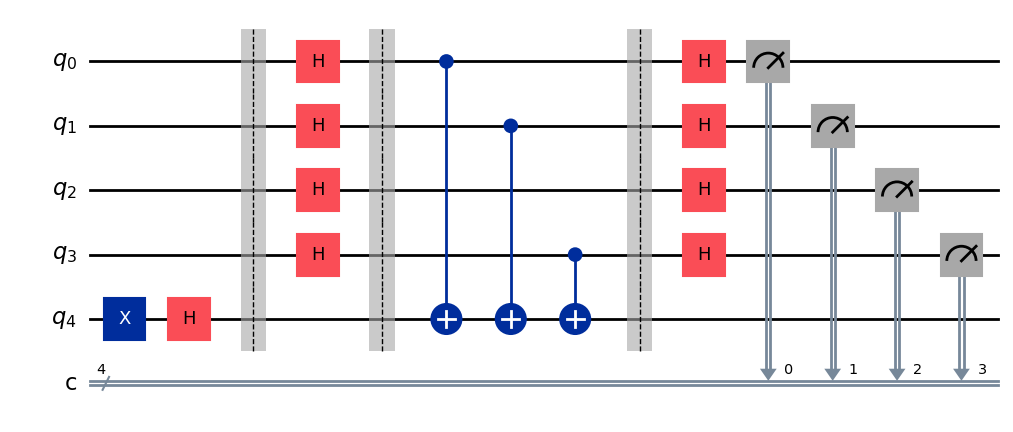

In [5]:
qc.draw('mpl')


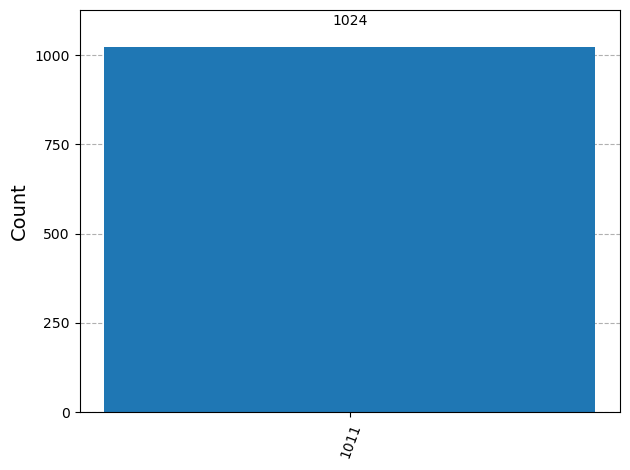

In [32]:
plot_histogram(counts)


In [34]:
plt.show()